In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pandas_profiling as pf


- ai is for indigo 
- aa is for air india

In [2]:
df=pd.read_excel('C:/Users/yashw/Downloads/Data_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [5]:
df['Day']=df['Date_of_Journey'].dt.dayofweek


In [6]:
# here i have made a new column 'Month'
df['Month']=df['Date_of_Journey'].dt.month 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Day              10683 non-null  int64         
 12  Month            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1.1+ MB


In [8]:
df['Additional_Info']=df['Additional_Info'].apply(lambda x:x.replace('No info','No Info') if(x=='No info') else x)

In [9]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [10]:
df['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Day                0
Month              0
dtype: int64

In [12]:
df.describe()

,Price,Day,Month
count,10683.000000,10683.000000,10683.000000
mean,9087.064121,2.892352,5.534775
std,4611.359167,1.836058,2.987489
min,1759.000000,0.000000,1.000000
25%,5277.000000,1.000000,3.000000
50%,8372.000000,3.000000,5.000000
75%,12373.000000,4.000000,6.000000
max,79512.000000,6.000000,12.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Day              10683 non-null  int64         
 12  Month            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1.1+ MB


In [14]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,6,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,13882,4,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,6218,3,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No Info,4107,2,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No Info,4145,5,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No Info,7229,5,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No Info,12648,3,1


In [16]:
# insight 1
df.groupby(['Airline','Source'])['Destination'].value_counts()

Airline                            Source    Destination
Air Asia                           Banglore  Delhi            71
                                             New Delhi        18
                                   Delhi     Cochin           80
                                   Kolkata   Banglore        150
Air India                          Banglore  New Delhi       212
                                             Delhi           120
                                   Chennai   Kolkata          25
                                   Delhi     Cochin          747
                                   Kolkata   Banglore        512
                                   Mumbai    Hyderabad       136
GoAir                              Banglore  Delhi            69
                                             New Delhi        24
                                   Delhi     Cochin           76
                                   Kolkata   Banglore         25
IndiGo                           

In [17]:
# how many Airlines india have
# insight 2
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [19]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [20]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month'],
      dtype='object')

In [21]:
# insight 3
# Jet Airways Business is the most expensive Airline and Spicejet is the cheapest Airline
df.groupby(['Airline'])['Price'].agg(['max','min'])

,max,min
Airline,,
Air Asia,13774,3383
Air India,31945,2050
GoAir,22794,3398
IndiGo,22153,2227
Jet Airways,54826,1840
Jet Airways Business,79512,46490
Multiple carriers,36983,5797
Multiple carriers Premium economy,14629,9845
SpiceJet,23267,1759


In [22]:
# how many flights took off in each Month.
df.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1        1075
3      3        2211
4      4         424
5      5        2074
6      6        2536
9      9        1406
12     12        957
Name: Month, dtype: int64

In [23]:
# Insight 4
# how many flights going from where to where
df.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          1265
          New Delhi       932
Chennai   Kolkata         381
Delhi     Cochin         4537
Kolkata   Banglore       2871
Mumbai    Hyderabad       697
Name: Destination, dtype: int64

In [24]:
zs=df.groupby(['Airline'])['Price'].min()

In [25]:
zs

Airline
Air Asia                              3383
Air India                             2050
GoAir                                 3398
IndiGo                                2227
Jet Airways                           1840
Jet Airways Business                 46490
Multiple carriers                     5797
Multiple carriers Premium economy     9845
SpiceJet                              1759
Trujet                                4140
Vistara                               3687
Vistara Premium economy               5969
Name: Price, dtype: int64

In [26]:
# Month,Source,Destination with their price
df.groupby(['Month','Source','Destination'])['Price'].value_counts()

Month  Source    Destination  Price
1      Banglore  Delhi        7229     21
                              4823     14
                              3943     12
                              4544      6
                              4668      6
                                       ..
12     Mumbai    Hyderabad    18293     1
                              20120     1
                              22294     1
                              23528     1
                              23843     1
Name: Price, Length: 3446, dtype: int64

In [27]:
# insight 6 
# from where each flight taking off
df.groupby(['Airline'])['Source'].agg([ "unique"])

,unique
Airline,
Air Asia,"[Banglore, Kolkata, Delhi]"
Air India,"[Kolkata, Delhi, Chennai, Banglore, Mumbai]"
GoAir,"[Delhi, Banglore, Kolkata]"
IndiGo,"[Banglore, Kolkata, Delhi, Chennai, Mumbai]"
Jet Airways,"[Delhi, Banglore, Kolkata, Mumbai]"
Jet Airways Business,"[Banglore, Delhi]"
Multiple carriers,[Delhi]
Multiple carriers Premium economy,[Delhi]
SpiceJet,"[Kolkata, Delhi, Banglore, Chennai, Mumbai]"


<AxesSubplot:xlabel='Airline', ylabel='Count'>

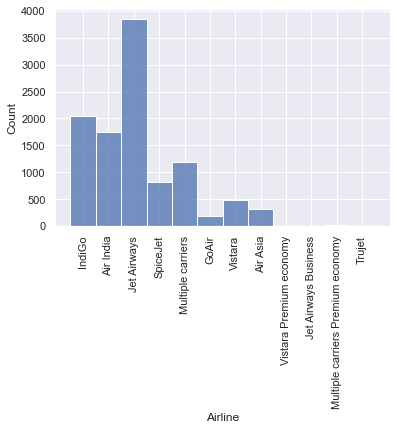

In [150]:
# 
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(df['Airline'])

In [29]:
pd.DataFrame(df['Airline'].value_counts())

,Airline
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13
Jet Airways Business,6


In [30]:
df['Source'].unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [31]:
a=df.iloc[np.where(df['Source']=='Delhi')]

In [32]:
a.groupby(['Source'])['Destination'].value_counts()

Source  Destination
Delhi   Cochin         4537
Name: Destination, dtype: int64

In [33]:
# insight 7 
# All flight from Delhi are going to Cochin
# 42.46% of all flights


In [34]:
# insight 8
# All flights from Kolkata ara going to Banglore
# 26.87% of all flights
v=df.iloc[np.where(df['Source']=='Kolkata')]
v.groupby(['Source'])['Destination'].value_counts()

Source   Destination
Kolkata  Banglore       2871
Name: Destination, dtype: int64

In [35]:
# All Flights from Mumbai are going to Hyderabad
# 6.52% of all flights
z=df.iloc[np.where(df['Source']=='Mumbai')]
z.groupby(['Source'])['Destination'].value_counts()

Source  Destination
Mumbai  Hyderabad      697
Name: Destination, dtype: int64

In [36]:
# All Flights from Chennai are going to Kolkata
# 3.56% of all flights
c=df.iloc[np.where(df['Source']=='Chennai')]
c.groupby(['Source'])['Destination'].value_counts()

Source   Destination
Chennai  Kolkata        381
Name: Destination, dtype: int64

In [37]:
# All Flights from Banglore are going to Delhi and New Delhi.
# 20.56% flights


# 11.84% -- Delhi
# 8.72% -- New Delhi
f=df.iloc[np.where(df['Source']=='Banglore')]
f.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          1265
          New Delhi       932
Name: Destination, dtype: int64

In [38]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
# insight 8
# Jet Airways Business is the only flight which is providing Business class Flights
# Every Business class Flight is going from same Surce to same Destination on same date
# with different Departure time,Arrival time and Duration. 

df.iloc[np.where(df['Additional_Info']=='Business class')]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,3,1
3032,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097,3,1
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,3,1
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,3,1


In [40]:
z=df.iloc[np.where((df['Additional_Info']=='In-flight meal not included')&(df['Price']<=20000))]

In [41]:
# insight 9
# Jet Airways and Multiple Carriers dont provide meal if price is less than Rs,20000
z['Airline'].unique()

array(['Jet Airways', 'Multiple carriers'], dtype=object)

In [42]:
# Source and the destination of above insght
z.groupby(['Source'])['Destination'].unique()

Source
Banglore    [New Delhi, Delhi]
Delhi                 [Cochin]
Kolkata             [Banglore]
Mumbai             [Hyderabad]
Name: Destination, dtype: object

In [43]:
# Red eye Flight means 'Late Night Departure'
df.iloc[np.where(df['Additional_Info']=='Red-eye flight')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
8122,Air Asia,2019-01-03,Banglore,New Delhi,BLR → DEL,23:25,02:10 02 Mar,2h 45m,non-stop,Red-eye flight,10873,3,1


In [44]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Count'>

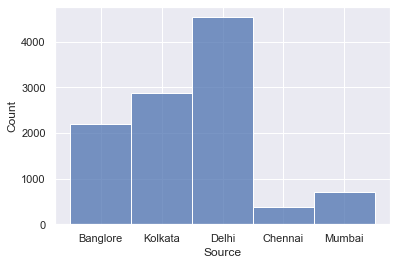

In [45]:
sns.set(style='darkgrid')
sns.histplot(df['Source'])

<AxesSubplot:xlabel='Destination', ylabel='Count'>

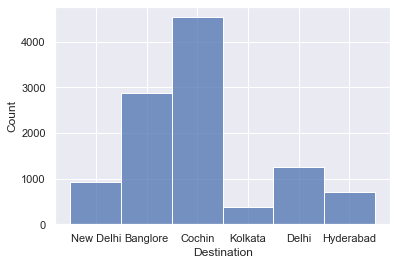

In [46]:
sns.histplot(df['Destination'])

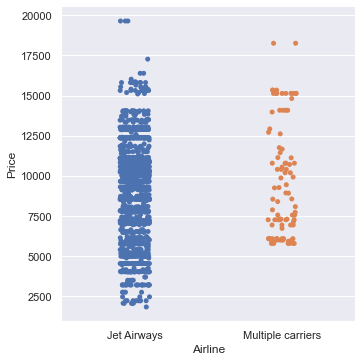

In [47]:
sns.catplot(x='Airline',y='Price',data=z)

In [48]:
# cheapest flight
df.iloc[np.where(df['Price'].min())]
        

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,6,3


In [49]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
# insght

# flight with most number of stops
df.iloc[np.where(df['Total_Stops']=='4 stops')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,Change airports,17686,3,1


In [51]:
df.iloc[np.where(df['Total_Stops']=='3 stops')].shape

(45, 13)

In [52]:
za=df.sort_values("Price", ascending = False)

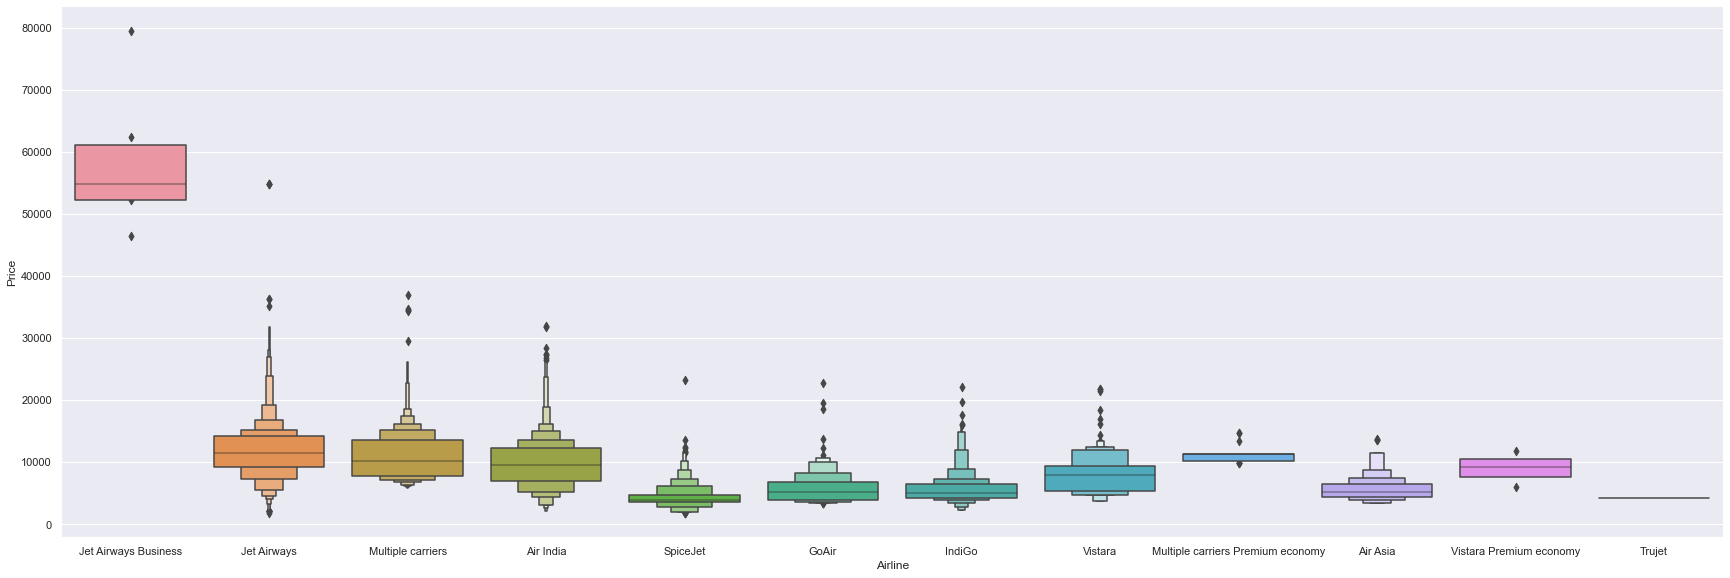

In [53]:
sns.catplot(y = "Price", x = "Airline", data=za, kind="boxen", height = 8, aspect = 3)


In [54]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [55]:
# airports has been changed...the common reason for this to decrease the frequency of 
# flights or to drop the entirely to or from their destination.
df.iloc[np.where(df['Additional_Info']=='Change airports')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
1712,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → GAU → DEL,05:50,22:10,16h 20m,2 stops,Change airports,13366,3,1
2883,Air India,2019-01-03,Banglore,New Delhi,BLR → COK → DEL,22:00,23:20 02 Mar,25h 20m,1 stop,Change airports,14305,3,1
3535,Air India,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,11:50,23:55,12h 5m,1 stop,Change airports,26092,3,1
8897,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → GAU → DEL,11:05,22:10,11h 5m,2 stops,Change airports,13576,3,1
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,Change airports,17686,3,1
9479,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → DEL,05:50,16:20,10h 30m,2 stops,Change airports,15119,3,1
10149,Air India,2019-01-03,Banglore,New Delhi,BLR → VGA → VTZ → DEL,10:30,17:45,7h 15m,2 stops,Change airports,17461,3,1


In [56]:
df.iloc[np.where(df['Additional_Info']=='1 Long layover')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
1043,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → DEL,11:05,19:50,8h 45m,1 stop,1 Long layover,14594,3,1
2079,Air India,2019-01-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,20:30,20h,1 stop,1 Long layover,14752,3,1
2405,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270,3,1
2481,Air India,2019-01-03,Banglore,New Delhi,BLR → AMD → DEL,00:30,23:55,23h 25m,1 stop,1 Long layover,12599,3,1
2495,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,16:55,07:40 02 Mar,14h 45m,1 stop,1 Long layover,26890,3,1
2556,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,16:55,10:25 02 Mar,17h 30m,1 stop,1 Long layover,25735,3,1
3111,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,21:20,9h 40m,1 stop,1 Long layover,27992,3,1
3700,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,22:50,09:30 02 Mar,10h 40m,1 stop,1 Long layover,31825,3,1
3788,Air India,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,11:50,13:00 02 Mar,25h 10m,1 stop,1 Long layover,15434,3,1
4521,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,16:55,09:00 02 Mar,16h 5m,1 stop,1 Long layover,25735,3,1


In [57]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# IndiGo Flights

In [58]:
ai=df.iloc[np.where(df['Airline']=='IndiGo')]
ai

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,6,3
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,6218,3,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,13302,3,1
11,IndiGo,2019-04-18,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No Info,4174,3,4
14,IndiGo,2019-04-24,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No Info,4804,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,2019-05-15,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5h 45m,1 stop,No Info,6037,2,5
10641,IndiGo,2019-06-03,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No Info,7295,0,6
10649,IndiGo,2019-01-03,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2h 40m,non-stop,No Info,4778,3,1
10664,IndiGo,2019-09-04,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No Info,4823,2,9


In [59]:
# How Many IndiGo Flghts Took Off in Each Month 
ai.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1        184
3      3        513
4      4        153
5      5        329
6      6        469
9      9        253
12     12       152
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

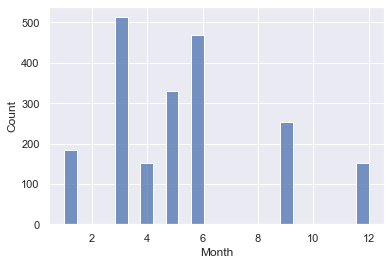

In [60]:
sns.histplot(ai['Month'])

In [61]:
# Max and Min Price Of IndiGo Flight
ai['Price'].agg(['max','min'])   

max    22153
min     2227
Name: Price, dtype: int64

In [62]:
# Frequecy of all Stops of IndiGo Flight.
ai['Total_Stops'].value_counts()

non-stop    1241
1 stop       793
2 stops       19
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

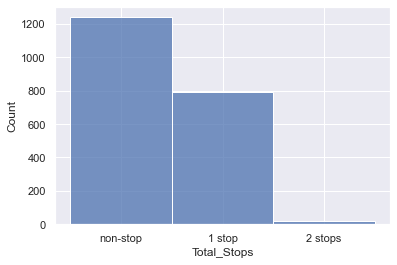

In [63]:
# this gragh showing frequency of Stops of Indigo flights
sns.histplot(ai['Total_Stops'])

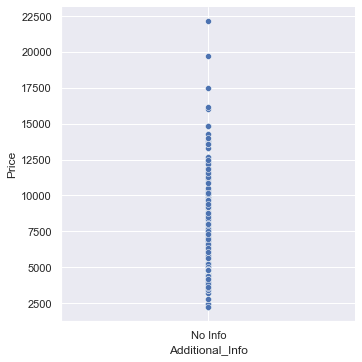

In [64]:
sns.relplot(x='Additional_Info',y='Price',data=ai)

In [65]:
ai['Additional_Info'].unique()

array(['No Info'], dtype=object)

In [66]:
# indiGo Flights with their sources and Destination 
ai.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          366
          New Delhi      157
Chennai   Kolkata        184
Delhi     Cochin         705
Kolkata   Banglore       445
Mumbai    Hyderabad      196
Name: Destination, dtype: int64

In [67]:
ai.describe()

,Price,Day,Month
count,2053.000000,2053.000000,2053.000000
mean,5673.682903,2.877740,5.306868
std,2264.142168,1.901358,2.871575
min,2227.000000,0.000000,1.000000
25%,4226.000000,1.000000,3.000000
50%,5000.000000,3.000000,5.000000
75%,6494.000000,4.000000,6.000000
max,22153.000000,6.000000,12.000000


In [68]:
# Sources and Destinations with Date of Journey of IndiGo Flights According to their Stops
pd.DataFrame(ai.groupby(['Date_of_Journey','Day','Source','Destination'])['Total_Stops'].value_counts())

Total_Stops
Date_of_Journey Day Source   Destination Total_Stops             
2019-01-03      3   Banglore New Delhi   non-stop              11
                                         1 stop                 8
                    Chennai  Kolkata     non-stop               5
                    Delhi    Cochin      2 stops                1
                    Kolkata  Banglore    non-stop               8
...                                                           ...
2019-12-06      4   Delhi    Cochin      1 stop                29
                                         non-stop               3
                    Kolkata  Banglore    non-stop               8
                                         1 stop                 7
                    Mumbai   Hyderabad   non-stop               8

[230 rows x 1 columns]

# Air India 

In [69]:
aa=df.iloc[np.where(df['Airline']=='Air India')]
aa

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662,5,1
10,Air India,2019-01-06,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No Info,8907,6,1
12,Air India,2019-06-24,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No Info,4667,0,6
15,Air India,2019-03-03,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No Info,14011,6,3
18,Air India,2019-12-06,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2 stops,No Info,13381,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,Air India,2019-12-05,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No Info,11411,3,12
10671,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No Info,3100,3,6
10675,Air India,2019-09-06,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No Info,3100,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No Info,4145,5,4


In [70]:
# How Many Air India Flights Takinf Off in Each Month.
aa.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1        197
3      3        369
4      4         45
5      5        352
6      6        386
9      9        234
12     12       169
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

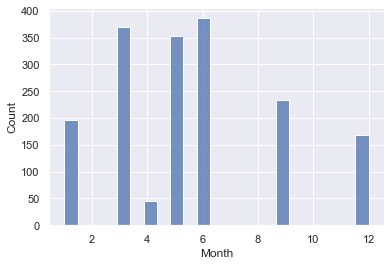

In [71]:
sns.histplot(aa['Month'])

In [72]:
# Max and Min Price of Price of Air India Flight.
aa['Price'].agg(['max','min'])   

max    31945
min     2050
Name: Price, dtype: int64

In [73]:
# Air India with its stop frequency.
aa['Total_Stops'].value_counts()

2 stops     756
1 stop      541
non-stop    417
3 stops      37
4 stops       1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

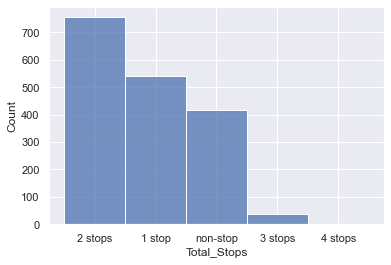

In [74]:
sns.histplot(aa['Total_Stops'])

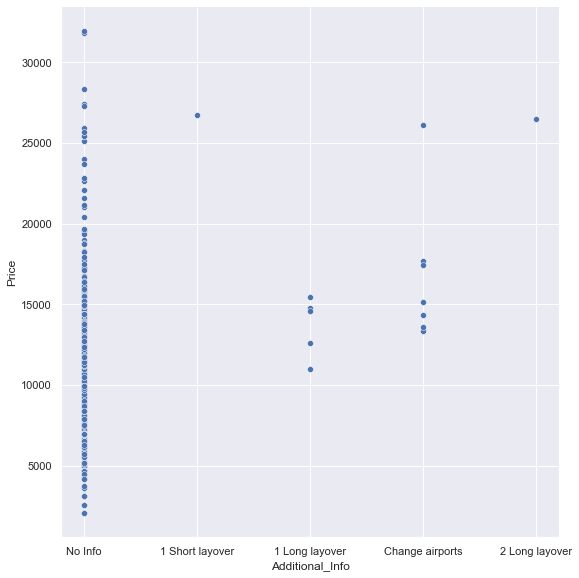

In [75]:
sns.relplot(x='Additional_Info',y='Price',data=aa,height=8)

In [76]:
# Air India flights with their Sources  and Destination Frequency
aa.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  New Delhi      212
          Delhi          120
Chennai   Kolkata         25
Delhi     Cochin         747
Kolkata   Banglore       512
Mumbai    Hyderabad      136
Name: Destination, dtype: int64

In [77]:
# Frequency of Source and Destination with their Date of Journey of Air India.
aa.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source    Destination
2019-01-03       3    Banglore  New Delhi      45
                      Chennai   Kolkata         1
                      Delhi     Cochin          3
                      Kolkata   Banglore        1
                      Mumbai    Hyderabad       3
                                               ..
2019-12-06       4    Banglore  Delhi           4
                      Chennai   Kolkata         1
                      Delhi     Cochin         38
                      Kolkata   Banglore       31
                      Mumbai    Hyderabad       3
Name: Destination, Length: 171, dtype: int64

# Jet Airways

In [78]:
ja=df.iloc[np.where(df['Airline']=='Jet Airways')]
ja

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,13882,4,9
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,1,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No Info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,1,12
13,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2 stops,No Info,21219,3,9
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150,3,6
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No Info,16704,0,5
10674,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087,1,12


In [79]:
# How Many Jet Airways Flights Took Off in Each Month.
ja.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1        430
3      3        674
4      4         63
5      5        783
6      6        931
9      9        544
12     12       424
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

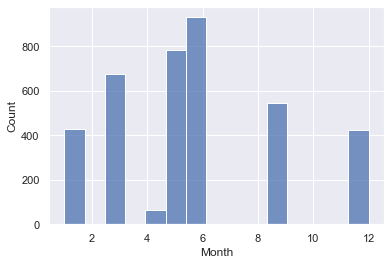

In [80]:
sns.histplot(ja['Month'])

In [81]:
# Max and Min Price of Jet Airways Flight
ja['Price'].agg(['max','min'])   

max    54826
min     1840
Name: Price, dtype: int64

In [82]:
# Jet Airways Flight Stops with their Frequency.
ja['Total_Stops'].value_counts()

1 stop      2535
2 stops      691
non-stop     623
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

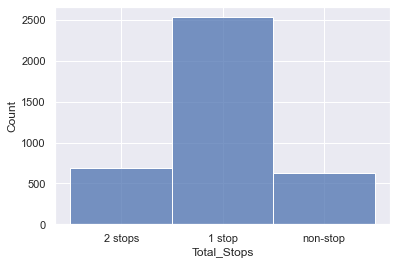

In [83]:
sns.histplot(ja['Total_Stops'])

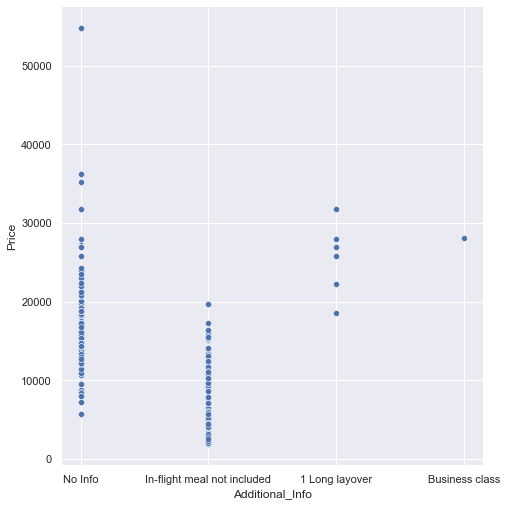

In [84]:
sns.relplot(x='Additional_Info',y='Price',data=ja,height=7)

In [85]:
# Source and Destination with their Date of Journey of Jet Airways Flight
ja.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source    Destination
2019-01-03       3    Banglore  New Delhi       69
                      Mumbai    Hyderabad        2
2019-01-04       4    Banglore  Delhi           12
                      Delhi     Cochin           9
                      Kolkata   Banglore        92
                                              ... 
2019-12-05       3    Mumbai    Hyderabad        5
2019-12-06       4    Banglore  Delhi           14
                      Delhi     Cochin          95
                      Kolkata   Banglore       100
                      Mumbai    Hyderabad        6
Name: Destination, Length: 115, dtype: int64

# SpiceJet

In [86]:
sj=df.iloc[np.where(df['Airline']=='SpiceJet')]
sj


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No Info,3873,0,6
16,SpiceJet,2019-04-15,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No Info,5830,0,4
36,SpiceJet,2019-05-21,Kolkata,Banglore,CCU → MAA → BLR,15:05,20:20,5h 15m,1 stop,No Info,4649,1,5
45,SpiceJet,2019-03-24,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,3527,6,3
79,SpiceJet,2019-03-21,Chennai,Kolkata,MAA → CCU,08:20,10:35,2h 15m,non-stop,No check-in baggage included,3332,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,SpiceJet,2019-12-06,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No check-in baggage included,5158,4,12
10604,SpiceJet,2019-12-05,Banglore,Delhi,BLR → DEL,09:30,12:20,2h 50m,non-stop,No check-in baggage included,4319,3,12
10628,SpiceJet,2019-09-05,Kolkata,Banglore,CCU → IXB → BLR,15:55,21:25,5h 30m,1 stop,No Info,8224,3,9
10654,SpiceJet,2019-12-06,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,4319,4,12


In [87]:
# How Many SpiceJet Flights Took Off in Each Month.
sj.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1         76
3      3        193
4      4         76
5      5        139
6      6        190
9      9         90
12     12        54
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

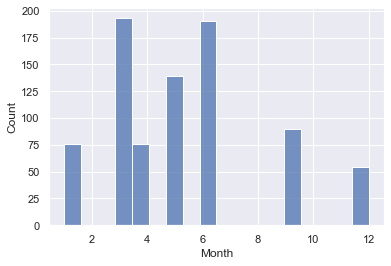

In [88]:
sns.histplot(sj['Month'])

In [89]:
# Max and Min Price Of SpiceJet Flight.
sj['Price'].agg(['max','min'])   

max    23267
min     1759
Name: Price, dtype: int64

In [90]:
# Frequency of Each Stop of SpiceJet Flight
sj['Total_Stops'].value_counts()

non-stop    670
1 stop      148
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

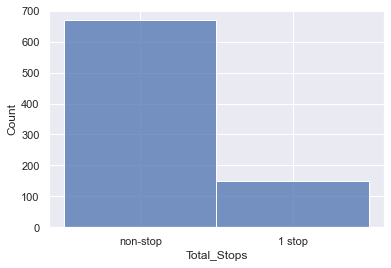

In [91]:

sns.histplot(sj['Total_Stops'])

In [92]:
# Source and Destination with their Date of Journey of SpiceJet
sj.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source    Destination
2019-01-03       3    Banglore  New Delhi       3
                      Chennai   Kolkata         3
                      Kolkata   Banglore        4
                      Mumbai    Hyderabad       2
2019-01-04       4    Banglore  Delhi           6
                                               ..
2019-12-06       4    Banglore  Delhi           4
                      Chennai   Kolkata         1
                      Delhi     Cochin          3
                      Kolkata   Banglore       10
                      Mumbai    Hyderabad       2
Name: Destination, Length: 164, dtype: int64

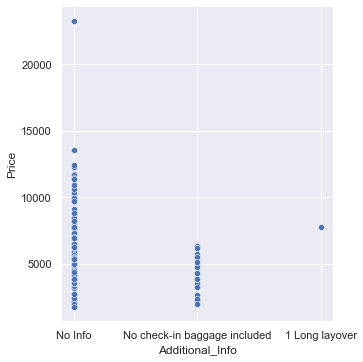

In [93]:
sns.relplot(x='Additional_Info',y='Price',data=sj)

# Multiple Carriers

In [94]:
mc=df.iloc[np.where(df['Airline']=='Multiple carriers')]

In [95]:
# How Many Multiple carriers Flights Took Off in Each Month.
mc.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1         75
3      3        261
4      4          2
5      5        292
6      6        341
9      9        160
12     12        65
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

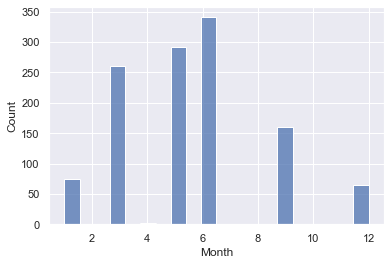

In [96]:
sns.histplot(mc['Month'])

In [97]:
# Max and Min Price of Multiple carriers Flight.
mc['Price'].agg(['max','min'])   

max    36983
min     5797
Name: Price, dtype: int64

In [98]:
# Frequency of Each Stop of Multiple carriers Flight
mc['Total_Stops'].value_counts()

1 stop     1145
2 stops      43
3 stops       8
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

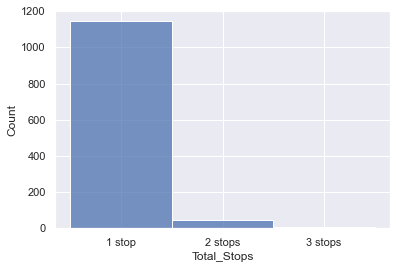

In [99]:
sns.histplot(mc['Total_Stops'])

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

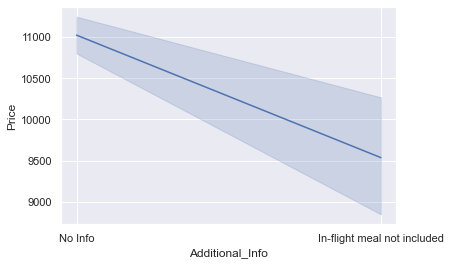

In [100]:
sns.lineplot(x='Additional_Info',y='Price',data=mc)

In [101]:
# Date of Journey,Day,Source with Destination of Multiple carriers Flight
mc.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source  Destination
2019-01-03       3    Delhi   Cochin          5
2019-01-05       5    Delhi   Cochin          5
2019-01-06       6    Delhi   Cochin         65
2019-03-03       6    Delhi   Cochin         58
2019-03-06       2    Delhi   Cochin         63
2019-03-21       3    Delhi   Cochin         71
2019-03-27       2    Delhi   Cochin         69
2019-04-24       2    Delhi   Cochin          1
2019-04-27       5    Delhi   Cochin          1
2019-05-15       2    Delhi   Cochin         69
2019-05-18       5    Delhi   Cochin         63
2019-05-21       1    Delhi   Cochin         67
2019-05-24       4    Delhi   Cochin          6
2019-05-27       0    Delhi   Cochin         87
2019-06-03       0    Delhi   Cochin         74
2019-06-05       2    Delhi   Cochin          5
2019-06-06       3    Delhi   Cochin         65
2019-06-15       5    Delhi   Cochin         63
2019-06-24       0    Delhi   Cochin         66
2019-06-27       3    Delhi   Cochin         6

# GoAir

In [102]:
ga=df.iloc[np.where(df['Airline']=='GoAir')]

In [103]:
# How Many GoAir Flight Took Off in Each Month.
ga.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1        21
3      3        43
4      4        22
5      5        28
6      6        45
9      9        23
12     12       12
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

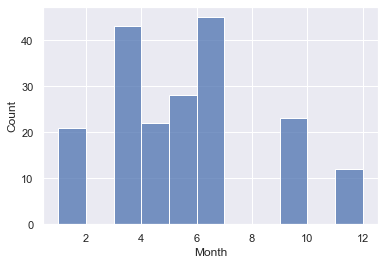

In [104]:
sns.histplot(ga['Month'])

In [105]:
# Max and Min Price of GoAir Flight.
ga['Price'].agg(['max','min'])   

max    22794
min     3398
Name: Price, dtype: int64

In [106]:
# Frequency of Each Stop Of GoAir Flight.
ga['Total_Stops'].value_counts()

1 stop      102
non-stop     92
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

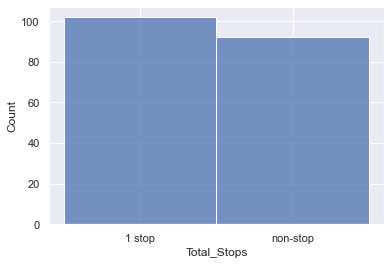

In [107]:
sns.histplot(ga['Total_Stops'])

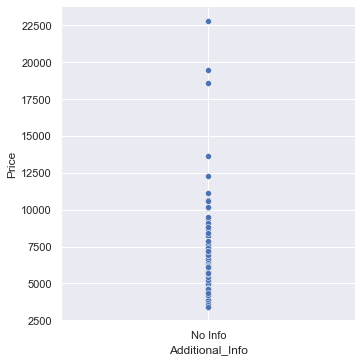

In [108]:
sns.relplot(x='Additional_Info',y='Price',data=ga)

In [109]:
# Date of Jourey,Day,Source with their Destination of GoAir Flight.
ga.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source    Destination
2019-01-03       3    Banglore  New Delhi      4
2019-01-04       4    Banglore  Delhi          2
                      Delhi     Cochin         2
                      Kolkata   Banglore       1
2019-01-05       5    Banglore  Delhi          3
                                              ..
2019-12-04       2    Banglore  Delhi          3
2019-12-05       3    Banglore  Delhi          2
                      Kolkata   Banglore       1
2019-12-06       4    Banglore  Delhi          2
                      Delhi     Cochin         4
Name: Destination, Length: 78, dtype: int64

# Vistara

In [110]:
v=df.iloc[np.where(df['Airline']=='Vistara')]
v

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
28,Vistara,2019-06-18,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No Info,4668,1,6
29,Vistara,2019-06-15,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No Info,3687,5,6
30,Vistara,2019-06-18,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No Info,3687,1,6
57,Vistara,2019-06-03,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No Info,7414,0,6
59,Vistara,2019-06-03,Mumbai,Hyderabad,BOM → DEL → HYD,15:40,16:45 07 Mar,25h 5m,1 stop,No Info,12395,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10624,Vistara,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:20,22:40 07 Jun,26h 20m,1 stop,No Info,8662,3,6
10656,Vistara,2019-06-04,Banglore,Delhi,BLR → DEL,07:00,09:40,2h 40m,non-stop,No Info,5613,1,6
10659,Vistara,2019-01-05,Banglore,Delhi,BLR → DEL,21:00,23:50,2h 50m,non-stop,No Info,4668,5,1
10660,Vistara,2019-03-21,Banglore,New Delhi,BLR → DEL,21:10,00:05 19 Mar,2h 55m,non-stop,No Info,4878,3,3


In [111]:
# How many Vistara Flights Took Off in Each Month.
v.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1         59
3      3         84
4      4         31
5      5         90
6      6        102
9      9         61
12     12        52
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

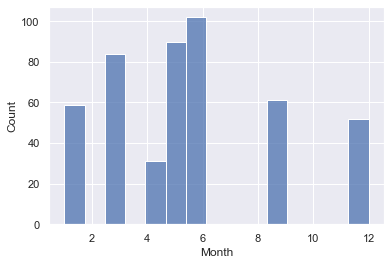

In [112]:
sns.histplot(v['Month'])

In [113]:
# Max and Min Price of Vistara Flight.
v['Price'].agg(['max','min'])   

max    21730
min     3687
Name: Price, dtype: int64

In [114]:
# Frequency of Each Stop of GoAir Flight.
v['Total_Stops'].value_counts()

non-stop    264
1 stop      215
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

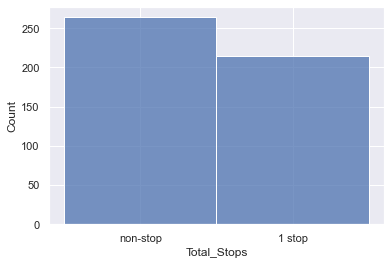

In [115]:
sns.histplot(v['Total_Stops'])

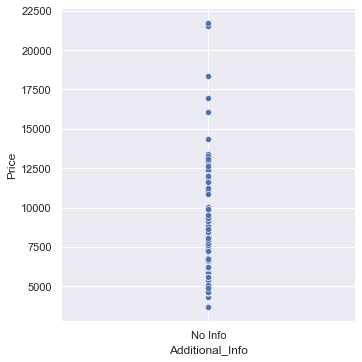

In [116]:
sns.relplot(x='Additional_Info',y='Price',data=v)

In [117]:
pd.DataFrame(v.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts())

Destination
Date_of_Journey Day Source   Destination             
2019-01-03      3   Banglore New Delhi              6
2019-01-04      4   Banglore Delhi                  5
                    Delhi    Cochin                 1
                    Kolkata  Banglore              18
2019-01-05      5   Banglore Delhi                  4
...                                               ...
2019-12-05      3   Kolkata  Banglore              10
2019-12-06      4   Banglore Delhi                  6
                    Chennai  Kolkata                2
                    Delhi    Cochin                 1
                    Kolkata  Banglore              16

[110 rows x 1 columns]

# Air Asia

In [118]:
asa=df.iloc[np.where(df['Airline']=='Air Asia')]
asa

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
43,Air Asia,2019-06-05,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No Info,3383,2,6
54,Air Asia,2019-03-04,Banglore,Delhi,BLR → DEL,23:55,02:45 04 Apr,2h 50m,non-stop,No Info,4483,0,3
189,Air Asia,2019-12-06,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No Info,3383,4,12
235,Air Asia,2019-01-05,Kolkata,Banglore,CCU → BLR,10:20,12:55,2h 35m,non-stop,No Info,4409,5,1
302,Air Asia,2019-12-05,Kolkata,Banglore,CCU → BLR,10:20,12:55,2h 35m,non-stop,No Info,5216,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10425,Air Asia,2019-12-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No Info,4409,2,12
10504,Air Asia,2019-12-06,Delhi,Cochin,DEL → BLR → COK,07:55,22:25,14h 30m,1 stop,No Info,6152,4,12
10550,Air Asia,2019-12-03,Kolkata,Banglore,CCU → BLR,19:35,22:05,2h 30m,non-stop,No Info,4384,1,12
10590,Air Asia,2019-03-24,Banglore,New Delhi,BLR → DEL,23:25,02:10 22 Mar,2h 45m,non-stop,No Info,3383,6,3


In [119]:
# How Many Air Asia Flight Took Off in Each Month.
asa.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1        28
3      3        59
4      4        32
5      5        61
6      6        69
9      9        41
12     12       29
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

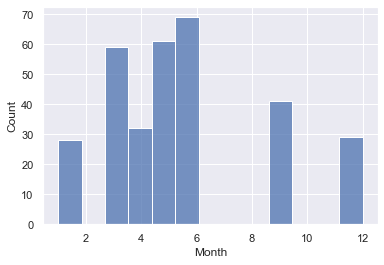

In [120]:
sns.histplot(asa['Month'])

In [121]:
# Max and Min Price Of Air Asia Flight
asa['Price'].agg(['max','min'])   

max    13774
min     3383
Name: Price, dtype: int64

In [122]:
# Frequecy of Each Stop of Air Asia Flight.
asa['Total_Stops'].value_counts()

non-stop    181
1 stop      129
2 stops       9
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

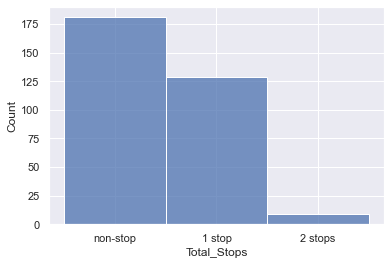

In [123]:
sns.histplot(asa['Total_Stops'])

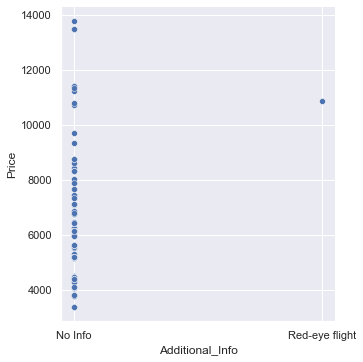

In [124]:
sns.relplot(x='Additional_Info',y='Price',data=asa)

In [125]:
# Date of Journey,Day,Source with their Destination of Air Asia Flight.
asa.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source    Destination
2019-01-03       3    Banglore  New Delhi      2
                      Kolkata   Banglore       2
2019-01-04       4    Banglore  Delhi          1
                      Kolkata   Banglore       5
2019-01-05       5    Banglore  Delhi          2
                                              ..
2019-12-05       3    Banglore  Delhi          3
                      Kolkata   Banglore       7
2019-12-06       4    Banglore  Delhi          2
                      Delhi     Cochin         3
                      Kolkata   Banglore       7
Name: Destination, Length: 98, dtype: int64

# Vistara Premium economy

In [126]:
vpe=df.iloc[np.where(df['Airline']=='Vistara Premium economy')]

In [127]:
# How Many Vistara Premium economy flights Took Off in Each Month.
vpe.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1        1
3      3        1
6      6        1
Name: Month, dtype: int64

In [128]:
# Max and Min Price of Vistara Premium economy Flight.
vpe['Price'].agg(['max','min'])   

max    11793
min     5969
Name: Price, dtype: int64

In [129]:
# Date of Journey,Day,Source with their destination of Vistara Premium economy Flight.
vpe.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source    Destination
2019-01-03       3    Chennai   Kolkata        1
2019-03-03       6    Banglore  New Delhi      1
2019-06-04       1    Banglore  Delhi          1
Name: Destination, dtype: int64

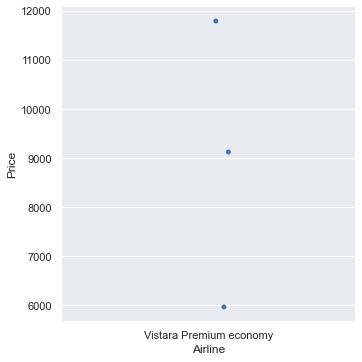

In [130]:
sns.catplot(x='Airline',y='Price',data=vpe)

# Jet Airways Business

In [131]:
jab=df.iloc[np.where(df['Airline']=='Jet Airways Business')]
jab

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
657,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No Info,52229,3,1
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,3,1
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,3,1
7351,Jet Airways Business,2019-03-03,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No Info,46490,6,3
9715,Jet Airways Business,2019-06-03,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No Info,52285,0,6
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,3,1


In [132]:
# Hw Many Jet Airways Business Flights Took Off in Each Month.
jab.groupby(['Month'])['Month'].value_counts()

Month  Month
1      1        4
3      3        1
6      6        1
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

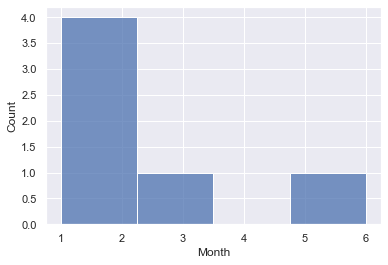

In [133]:
sns.histplot(jab['Month'])

In [134]:
# Max and Min Price of Jet Airways Business Flight
jab['Price'].agg(['max','min'])   

max    79512
min    46490
Name: Price, dtype: int64

In [135]:
# Frequency Of Each Stops Of Jet Airways Business Flight.
jab['Total_Stops'].value_counts()

1 stop     4
2 stops    2
Name: Total_Stops, dtype: int64

In [136]:
# Date of Journey,Day,Source with their Destination of Jet Airways Business Flight.
jab.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source    Destination
2019-01-03       3    Banglore  New Delhi      4
2019-03-03       6    Delhi     Cochin         1
2019-06-03       0    Delhi     Cochin         1
Name: Destination, dtype: int64

In [137]:
jab.groupby(['Additional_Info'])['Price'].value_counts()

Additional_Info  Price
Business class   57209    1
                 62427    1
                 79512    1
No Info          46490    1
                 52229    1
                 52285    1
Name: Price, dtype: int64

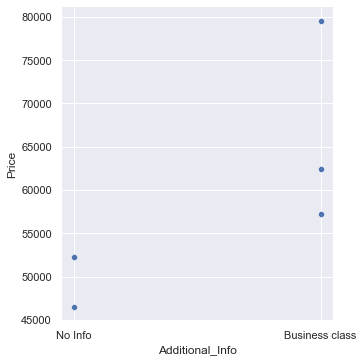

In [138]:
sns.relplot(x='Additional_Info',y='Price',data=jab)

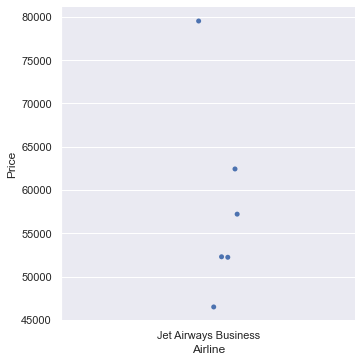

In [139]:
sns.catplot(x='Airline',y='Price',data=jab)

# Multiple carriers Premium economy

In [140]:
mcp=df.iloc[np.where(df['Airline']=='Multiple carriers Premium economy')]
mcp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
717,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No Info,10161,3,3
1799,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,07:30,21:00,13h 30m,1 stop,No Info,9845,3,3
4627,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,08:55,19:15,10h 20m,1 stop,No Info,10161,3,3
4718,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,06:00,21:00,15h,1 stop,No Info,9845,3,3
5090,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,06:00,13:20,7h 20m,1 stop,No Info,11269,3,3
5489,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,06:00,15:30,9h 30m,1 stop,No Info,11269,3,3
5673,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,06:00,18:50,12h 50m,1 stop,No Info,14629,3,3
5836,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,07:30,18:50,11h 20m,1 stop,No Info,14629,3,3
6470,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No Info,9845,3,3
6591,Multiple carriers Premium economy,2019-03-21,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No Info,11269,3,3


In [141]:
# How Many Multiple carriers Premium economy Flights Took Off in Each Month.
mcp.groupby(['Month'])['Month'].value_counts()

Month  Month
3      3        13
Name: Month, dtype: int64

In [142]:
# Max and Min Price of Multiple carriers Premium economy Flight.
mcp['Price'].agg(['max','min'])   

max    14629
min     9845
Name: Price, dtype: int64

In [143]:
# Frequency of Each Stops of Multiple carriers Premium economy Flight
mcp['Total_Stops'].value_counts()

1 stop    13
Name: Total_Stops, dtype: int64

In [144]:
mcp['Additional_Info'].value_counts()

No Info    13
Name: Additional_Info, dtype: int64

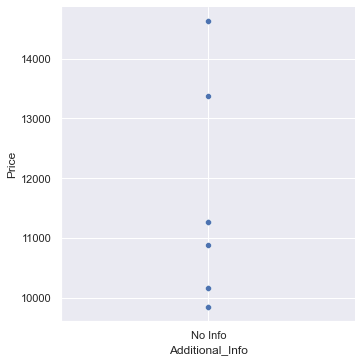

In [145]:
sns.relplot(x='Additional_Info',y='Price',data=mcp)

In [146]:
# Date of Journey,Day,Source with their Destination of Multiple carriers Premium economy.
mcp.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()

Date_of_Journey  Day  Source  Destination
2019-03-21       3    Delhi   Cochin         13
Name: Destination, dtype: int64

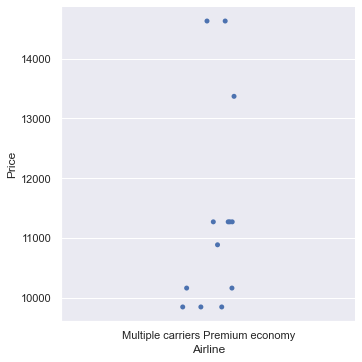

In [147]:
sns.catplot(x='Airline',y='Price',data=mcp)

# Trujet

In [148]:
df.iloc[np.where(df['Airline']=='Trujet')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
2878,Trujet,2019-06-03,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No Info,4140,0,6


In [149]:
# Date of Journey,Day,Source with their Destination of Trujet.
asa.groupby(['Date_of_Journey','Day','Source'])['Destination'].value_counts()


Date_of_Journey  Day  Source    Destination
2019-01-03       3    Banglore  New Delhi      2
                      Kolkata   Banglore       2
2019-01-04       4    Banglore  Delhi          1
                      Kolkata   Banglore       5
2019-01-05       5    Banglore  Delhi          2
                                              ..
2019-12-05       3    Banglore  Delhi          3
                      Kolkata   Banglore       7
2019-12-06       4    Banglore  Delhi          2
                      Delhi     Cochin         3
                      Kolkata   Banglore       7
Name: Destination, Length: 98, dtype: int64

<AxesSubplot:>

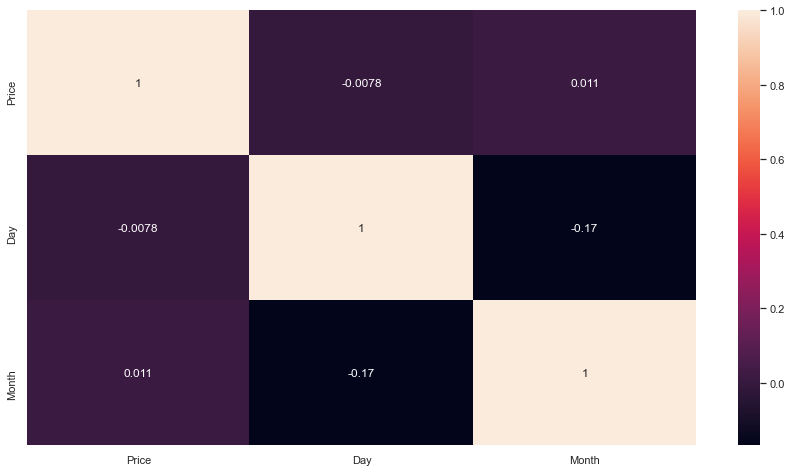

In [152]:
sns.heatmap(df.corr(),annot=True)

In [158]:
v=pf.ProfileReport(df)

In [159]:
v

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]